In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
from torchvision import transforms, datasets
from model.network import ResidualAttentionModel_56
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import confusion_matrix
tqdm.monitor_interval = 0 
import itertools
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [5]:
test_data = '/data/dungdv/music/fold_data/music/validate_set'
model_file = './checkpoint/music_attention.pth'
def idx_to_label(label_to_idx,idx):
    for key, value in label_to_idx.items():    # for name, age in dictionary.iteritems():  (for Python 2.x)
        if value == idx:
            return key
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

{'1': 0, '10': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}


0it [00:00, ?it/s]/home/dungdv/miniconda3/envs/music/lib/python3.6/site-packages/torch/nn/modules/upsampling.py:129: UserWarning: nn.UpsamplingBilinear2d is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.{} is deprecated. Use nn.functional.interpolate instead.".format(self.name))
13167it [05:34, 39.37it/s]



Confusion matrix, without normalization
[[ 289    7    1    0   17    7    0    2    0    2]
 [   2  505  146    8   22   29   38  159   10   23]
 [  43  133  546    7   43   26   41  324    4   23]
 [   0   11   23  987    6   37   13   46  218   96]
 [   3   18   25    1  809   20   28   76    6   27]
 [   0   26   29    6    8  754    7   32   13    4]
 [   0   31   28    1   11    9  218   94    2   22]
 [  71  518  678   54  197  169  474 3359  158  356]
 [   0    5    0   12    5    2    1    6  267   14]
 [   0    6   22    2    2   11    6   30   36  504]]


<Figure size 432x288 with 0 Axes>

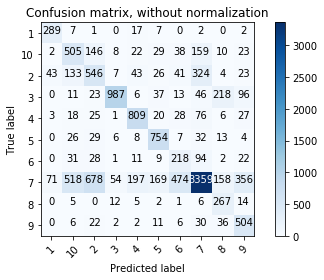

<Figure size 432x288 with 0 Axes>

In [6]:
transform = transforms.Compose([
    transforms.ToTensor()
])
test_dataset = datasets.ImageFolder(test_data,
                                        transform=transform)
class_to_idx = test_dataset.class_to_idx
class_names = [key for key, value in class_to_idx.items()]
print(class_to_idx)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=False, num_workers=1)
model = ResidualAttentionModel_56().cuda()
model.load_state_dict(torch.load(model_file))
model.eval()

y_predict = []
y_test = []

for i, (images, labels) in tqdm(enumerate(test_loader)):
    with torch.no_grad():
        images = Variable(images).cuda()
    output = model(images)[0]
    predict_label = np.argmax(output.cpu().detach().numpy())
    predict_label = int(idx_to_label(class_to_idx, predict_label))
    y_predict.append(predict_label)
    ground_true = int(idx_to_label(class_to_idx,labels[0].cpu().detach().numpy()))
#     print(pre)
#     print(ground_true)
    y_test.append(ground_true)

print()
cnf_matrix = confusion_matrix(y_predict, y_test)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()


{'1': 0, '10': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}


26it [00:00, 34.65it/s]

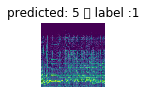

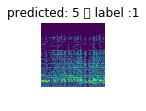

30it [00:00, 25.58it/s]

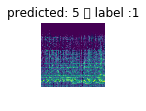

50it [00:01, 32.09it/s]

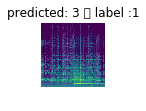

99it [00:03, 37.17it/s]

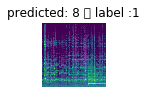

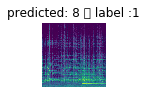

In [14]:
transform = transforms.Compose([
    transforms.ToTensor()
])
test_dataset = datasets.ImageFolder(test_data,
                                        transform=transform)
class_to_idx = test_dataset.class_to_idx
class_names = [key for key, value in class_to_idx.items()]
print(class_to_idx)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=False, num_workers=1)
model = ResidualAttentionModel_56().cuda()
model.load_state_dict(torch.load(model_file))
model.eval()

def visualize_model(model, n_images=6):
    count = 0
    for i, (images, labels) in tqdm(enumerate(test_loader)):
        with torch.no_grad():
            images = Variable(images).cuda()
        output = model(images)[0]
        predict_label = np.argmax(output.cpu().detach().numpy())
        predict_label = int(idx_to_label(class_to_idx, predict_label))
        ground_true = int(idx_to_label(class_to_idx,labels[0].cpu().detach().numpy()))
        if predict_label != ground_true:
            count += 1 
            ax = plt.subplot(n_images//2, 2, count)
            ax.axis('off')
            ax.set_title('predicted: {} \t label :{}'.format(predict_label,ground_true))
            image =images[0].permute(1, 2, 0).cpu().numpy()
            plt.imshow(image)
            plt.show()
        if count == n_images:
            return
visualize_model(model)
        